# **Instructions**

This document is a template, and you are not required to follow it exactly. However, the kinds of questions we ask here are the kinds of questions we want you to focus on. While you might have answered similar questions to these in your project presentations, we want you to go into a lot more detail in this write-up; you can refer to the Lab homeworks for ideas on how to present your data or results. 

You don't have to answer every question in this template, but you should answer roughly this many questions. Your answers to such questions should be paragraph-length, not just a bullet point. You likely still have questions of your own -- that's okay! We want you to convey what you've learned, how you've learned it, and demonstrate that the content from the course has influenced how you've thought about this project.

# Project Name
Project mentor: Sophia Sklaviadis

Yuxiang Hu <yhu102@jh.edu>, Justin Nam <jnam17@jh.edu>, Chenyu Xie <cxie15@jh.edu>, Yinong Zhao <yzhao120@jh.edu>

https://github.com/justinnam1212/machine_learning_final

Colab: https://colab.research.google.com/drive/1U0fBXFMr68le9Bv6RdhEIPLVq74IKY31#scrollTo=Eiq2aSauhSsS

Dataset: https://drive.google.com/drive/folders/1TRmypOU2wwILSsad4CuG_wZTkdgVkOP-?usp=share_link

# Outline and Deliverables



List the deliverables from your project proposal. For each uncompleted deliverable, please include a sentence or two on why you weren't able to complete it (e.g. "decided to use an existing implementation instead" or "ran out of time"). For each completed deliverable, indicate which section of this notebook covers what you did.

If you spent substantial time on any aspects that weren't deliverables in your proposal, please list those under "Additional Work" and indicate where in the notebook you discuss them.

### Uncompleted Deliverables
1. "Must complete complete #2": To preserve time, we did not implement the shallow CNN
2. "Expect to accomplish #1": We did not pursue this goal and instead focused on the 85 animal attributes
3. "Expect to accomplish #2 and 3": We work on improving the model via introducing a GAN to help generalize our model, as described in the Methods section below; this is still a work in progress due to some complications with implementation
4. "Would like to complete #2 and #3": Due to time constraints and due to focusing on the GAN, we did not get to work on the captioning aspect


### Completed Deliverables
1. "Must complete #1": We discuss our dataset pre-processing [in "Dataset" below](#scrollTo=zFq-_D0khnhh&line=10&uniqifier=1).
2. "Must complete #3": We discuss our ResNet model in the ["Model"](#scrollTo=Models_and_Evaluation) section below.
3. "Must complete #4?": We achieve our minimum score of 60 with respect to classifying attributes. The baseline model achieved a score of 94.06 in validation and 71.36 in testing. Our custom model achieved a score of 96.89 in validation and 71.54 in testing; note that these are just for classifying the attributes; our true animal class score still requires refining, but has seen progress with the introduction of the GAN. (see ["Results"](#scrollTo=Results))


### Additional Deliverables
1. We decided to focus on zero-shot learning due to work previously done on this dataset and how the data is organized by animals (see ["Methods"](#scrollTo=Methods_Chenyu_))
2. To improve our model, particularly after turning to zero-shot learning, we aimed to introduce a conditional GAN in order to help reduce bias in the model since it is being tested on previously unseen classes (see ["Methods"](#scrollTo=Methods_Chenyu_))

# Preliminaries

## What problem were you trying to solve or understand?

What are the real-world implications of this data and task? (image classification + zero-shot learning)

*The application of the machine learning method underpinning this task of imgae classification could be widely lent to the field of facial recognition, medical diagnosis concerning tissue segmentation and so on. Because these days so many problems are faced with the ability of computer having some level of vision onto visual objects, the training we have had from this project will give us experience when it comes to the solutions of such senarios. Besides, zero-shot learning relies on semantic class representations such as hand-engineered attributes or learned embeddings to predict classes without any labeled examples. This very much aligned with the model we are implementing in terms of the anaimal classes being observed are different than those trained upon. The bridge between the observed classes and the predicting ones are often established through some attributes that serve as add-on to the classification labels. Since the concept of zero-shot learning first introduced in the context of natural language processing and computer vision around 2008, this method as been widely applied in the computer vision community. The success of this domain adaptation approach generally relies on the support from attributes that precede the classification task. In a more generalized settings, the testing set can also contain the observed and unobserved classes at the same time so it’s also the model’s job to distinguish among these two cases, but this also give the model more generalization power when it comes to real-world challenges where we do not necessarily have the idea which classes the datapoint that we’re trying to predict come from.”*

How is this problem similar to others we’ve seen in lectures, breakouts, and homeworks?

*The image recognition tasks align heavily with the Convolutional Neural Network (CNN) as one type of the deep learning frameworks that we covered back in lectures. Image features can be extracted from images by the convolutional layers of CNN. Zero-shot learning is quite similar to domain generalization, since training set and test set come from different domains and they have different distributions. Besides, the Generative Adversial Network (GAN) as one of the generative models we try to implement to mitigate the bias toward training set and resolve the issues caused by domain shift is also a complementary tool as compared to the discriminative models.* 

What makes this problem unique?

*The problem of this project involves dealing with unseen data from training set in testing phase, and this requires the generalization power of our model armed to predict unseen object. To tackle this, we introduce generative models along with the regular discriminative model to mitigate the bias, and this combination makes our practice unique.*

What ethical implications does this problem have?

*We are not really having any ethical problems. Images in the AWA2 dataset comes from public web resources and redistribution licenses are also provided. So no copyright issues are raised for this.*

## Dataset(s)

Describe the dataset(s) you used.

*Animals with Attributes 2 (AwA2) is a dataset for benchmarking transfer-learning algorithms, such as attribute-based classification and zero-shot learning. (reference to https://paperswithcode.com/dataset/awa2-1) AwA2 consists of in total 37322 images distributed in 50 animal categories. Besides, each animal class includes 85 shared attributes represented with binary values.*

How were they collected?

*AwA2 is a drop-in replacement of original Animals with Attributes (AwA) dataset, with more images released for each category. These images are collected from public web sources, such as Wikipedia.*

Why did you choose them?

*The proposed split for training classes and test classes guarantees that test classes do not belong to any one of the 1000 object classes in the ImageNet dataset that ResNet is trained on such that we can use pretrained ResNet directly to extract features without destroying the goal of zero-shot learning. Both Semantic attributes used to provide extra information for exploring zero-shot learning and images are contained in this dataset. Besides, images are collected from public web sources and redistribution licenses are included.*

How many examples in each?

*Among the training classes, there are around 758 different images for each type of animal on average. The least populated animal class has 100 images and the most populated animal class has 1645 images. But for the test classes, the minimum number of images is 310 and the maximum number of images is 988. On average, there are about 698 different images for each type of animal. In addition, the distribution of the number of images for test classes differ from that for training classes, as shown in the tables in the preprocessing part.*


In [ ]:
# Load your data and print 2-3 
from google.colab import drive
drive.mount('/content/drive')
dir = 'drive/MyDrive/ML_Project_Data'

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader, random_split
import matplotlib.pyplot as plt
from torchvision.io import read_image, ImageReadMode
from torchvision import transforms
from collections import OrderedDict
from datetime import datetime

In [ ]:
with open(os.path.join(dir, 'trainclasses.txt')) as f:
    classes = f.read().splitlines()

with open(os.path.join(dir, 'predicates.txt')) as f:
    predicates = f.read().splitlines()

predicates = [s.split('\t')[1] for s in predicates]
print(predicates)

['black', 'white', 'blue', 'brown', 'gray', 'orange', 'red', 'yellow', 'patches', 'spots', 'stripes', 'furry', 'hairless', 'toughskin', 'big', 'small', 'bulbous', 'lean', 'flippers', 'hands', 'hooves', 'pads', 'paws', 'longleg', 'longneck', 'tail', 'chewteeth', 'meatteeth', 'buckteeth', 'strainteeth', 'horns', 'claws', 'tusks', 'smelly', 'flys', 'hops', 'swims', 'tunnels', 'walks', 'fast', 'slow', 'strong', 'weak', 'muscle', 'bipedal', 'quadrapedal', 'active', 'inactive', 'nocturnal', 'hibernate', 'agility', 'fish', 'meat', 'plankton', 'vegetation', 'insects', 'forager', 'grazer', 'hunter', 'scavenger', 'skimmer', 'stalker', 'newworld', 'oldworld', 'arctic', 'coastal', 'desert', 'bush', 'plains', 'forest', 'fields', 'jungle', 'mountains', 'ocean', 'ground', 'water', 'tree', 'cave', 'fierce', 'timid', 'smart', 'group', 'solitary', 'nestspot', 'domestic']


In [ ]:
classes = pd.read_csv('/content/drive/My Drive/ML_Project_Data/classes.txt', sep='\t', index_col=0, header=None)
classes.columns = ['class']
classes['label'] = np.arange(1, len(classes) + 1)
classes.head(10)

,class,label
0,,
1,antelope,1
2,grizzly+bear,2
3,killer+whale,3
4,beaver,4
5,dalmatian,5
6,persian+cat,6
7,horse,7
8,german+shepherd,8
9,blue+whale,9


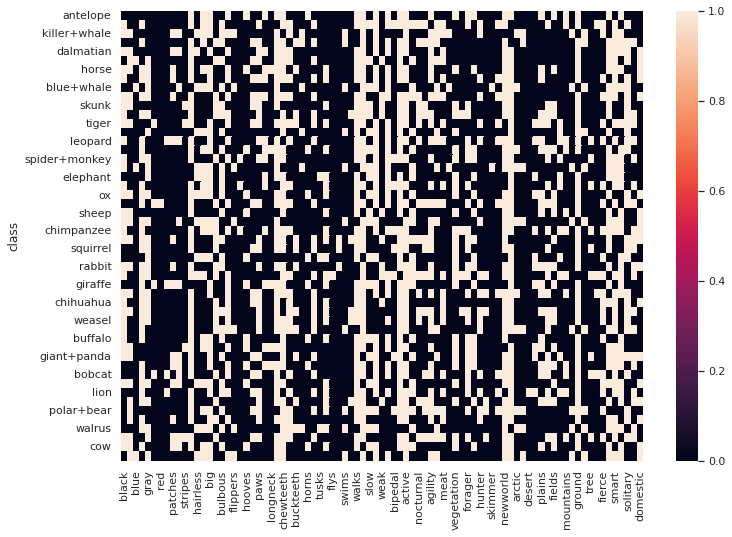

In [ ]:
import seaborn as sns

with open(os.path.join(dir, 'predicate-matrix-binary.txt')) as f:
    rows = f.read().splitlines()
    rows = [r.split(' ') for r in rows]
matrix = pd.DataFrame(rows).astype(float)
matrix.index = classes['class']
matrix.columns = predicates

sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.heatmap(matrix);

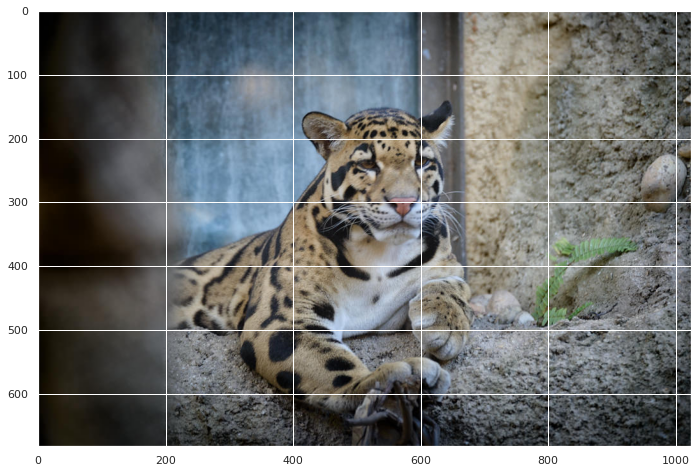

(683, 1024, 3)

In [ ]:
import cv2
ex_1 = cv2.imread(os.path.join(dir, 'test','leopard', 'leopard_10010.jpg'))
plt.imshow(cv2.cvtColor(ex_1, cv2.COLOR_BGR2RGB))
plt.show()
display(ex_1.shape)

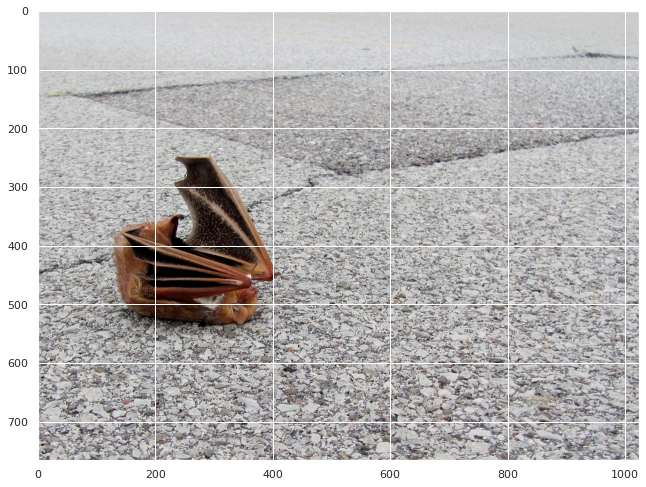

(766, 1024, 3)

In [ ]:
ex_2 = cv2.imread(os.path.join(dir, 'train','bat', 'bat_10001.jpg'))
plt.imshow(cv2.cvtColor(ex_2, cv2.COLOR_BGR2RGB))
plt.show()
display(ex_2.shape)

## Pre-processing

What features did you use or choose not to use? Why?

*We are using the pixels in the images as features in the  image feature extraction part. Square crop is implement to resize our original images to images with both height and width equal to 224, since the size of our images differs both between animal categories and within animal categories.*

If you have categorical labels, were your datasets class-balanced?

*No, our categorical labels are unbalanced since our the number of both 85 shared-attributes vectors and animal class lables are in according with the number of images for each animal type. Distributions of our categorical labels for both seen classes and unseen classes are shown in the table below.*

How did you deal with missing data? What about outliers?

*We don't have missing data per say as in the structural dataset, each image is a contiguous collection of pixels. Besides, for each class, we use 85 shared attributes with binary values to provide semantic information for classifcation. Also, animal classes are annotated using discrete values ranging from 1 to 50. Therefore, all these categorical variables are not considered as missing data or outliers.*

What approach(es) did you use to pre-process your data? Why?

*We first transform our images into PIL images so that we could easily handle the size of images. Then we perform a 224x224 square crop to obtain images with equal size. To overcome the computation complexity, we convert pixel values to range from 0 to 1. Normalization of pixel values are performed according the mean values and standard deviations of pixes of ImageNet for each color channel.*

Are your features continuous or categorical? How do you treat these features differently?

*The pixels themselves are continuous. However, the 85-dimensional attribute vectors and animal labels are catogorial. For the continuous feature, we feed them into ResNet-50 which handles them through convolutional layers and one fully connected layers to extract image features. For binaray-annotated attribute vectors, they are treated as attribute classes and serve as target variables when projection function is learned. Besides, attribute vectors are considered as predicators and animal labels annotated by discrete values ranging from 1 to 50 serve as target variables when nearest neighbor search is performed.*

In [ ]:
# For those same examples above, what do they look like after being pre-processed?

In [ ]:
# Visualize the distribution of your data before and after pre-processing.
#   You may borrow from how we visualized data in the Lab homeworks.

In [ ]:
train_dir = os.path.join(dir,'./train')
test_dir = os.path.join(dir,'./test')

In [ ]:
# Count the number of images for each class
train_class_num = {}
for image_class in os.listdir(train_dir):
    train_class_num[image_class] = len(
        os.listdir(os.path.join(train_dir, image_class)))
test_class_num = {}
for image_class in os.listdir(test_dir):
    test_class_num[image_class] = len(
        os.listdir(os.path.join(test_dir, image_class)))

# Order keys by alphabetic ascending order
train_class_num = OrderedDict(sorted(train_class_num.items()))
test_class_num = OrderedDict(sorted(test_class_num.items()))

# Assign categorical labels to each animal type
pos = 1
train_class_label = {}
test_class_label = {}
for class_ in classes['class'].values:
    if class_ in train_class_num:
        train_class_label[class_] = pos
    if class_ in test_class_num:
        test_class_label[class_] = pos
    pos += 1

matrix.index = np.arange(1, len(matrix) + 1)
train_labels = list(train_class_label.values())
test_labels = list(test_class_label.values())

train_matrix = matrix.loc[train_labels].copy()
train_matrix['num'] = list(train_class_num.values())
train_matrix['label'] = classes.loc[train_labels]['label']

test_matrix = matrix.loc[test_labels].copy()
test_matrix['num'] = list(test_class_num.values())
test_matrix['label'] = classes.loc[test_labels]['label']

# repeat
train_matrix = train_matrix.reindex(
    train_matrix.index.repeat(train_matrix.num))
test_matrix = test_matrix.reindex(test_matrix.index.repeat(test_matrix.num))

# drop
train_matrix.drop(['num'], axis=1, inplace=True)
test_matrix.drop(['num'], axis=1, inplace=True)

# get all image file names for training and test set
train_files = []
test_files = []
for path, subdirs, files in os.walk(train_dir):
    for name in files:
        train_files.append(name)
for path, subdirs, files in os.walk(test_dir):
    for name in files:
        test_files.append(name)
train_files.sort()
test_files.sort()

train_matrix['filenames'] = train_files
test_matrix['filenames'] = test_files


In [ ]:
# image num statistics for training class(before training/validation split)
train_num = pd.DataFrame(train_class_num, index = ['num']).T
display(train_num)

,num
antelope,1046
bat,383
beaver,193
blue+whale,174
bobcat,630
buffalo,895
chihuahua,567
collie,1028
cow,1338
dalmatian,549


In [ ]:
# image num statistics for test class
test_num = pd.DataFrame(test_class_num, index = ['num']).T
display(test_num)

,num
chimpanzee,728
giant+panda,874
hippopotamus,684
humpback+whale,709
leopard,720
persian+cat,747
pig,713
raccoon,512
rat,310
seal,988


In [ ]:
display(train_num.describe())
display(test_num.describe())

,num
count,40.000000
mean,758.375000
std,396.074953
min,100.000000
25%,470.750000
50%,768.500000
75%,1034.000000
max,1645.000000


,num
count,10.000000
mean,698.500000
std,183.950627
min,310.000000
25%,690.250000
50%,716.500000
75%,742.250000
max,988.000000


In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, img_dir, attributes_file, transform=None, attributes_transform=None):
        self.attributes = attributes_file
        self.img_dir = img_dir
        self.transform = transform
        self.attributes_transform = attributes_transform

    def __len__(self):
        return len(self.attributes)

    def __getitem__(self, idx):
        img_path = os.path.join(
            self.img_dir, self.attributes.iloc[idx, -1].split("_", 1)[0], self.attributes.iloc[idx, -1])
        image = read_image(img_path, mode=ImageReadMode.RGB)
        attributes = np.array(self.attributes.iloc[idx, :85].values.tolist())
        labels = np.array(self.attributes.iloc[idx, -2])

        if self.transform:
            image = self.transform(image)
        if self.attributes_transform:
            attributes = self.attributes_transform(attributes)
            labels = self.attributes_transform(labels)
        return image, attributes, labels

In [ ]:
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))])
attri_transform = transforms.Compose([
    torch.from_numpy])
training_data = CustomImageDataset(img_dir=train_dir, attributes_file=train_matrix,
                                   transform=transform, attributes_transform=attri_transform)
test_data = CustomImageDataset(img_dir=test_dir, attributes_file=test_matrix,
                               transform=transform, attributes_transform=attri_transform)

In [ ]:
torch.manual_seed(17)
def train_val_split(train_dataset):
    train_size = int(len(train_dataset) * 0.8)
    val_size = len(train_dataset) - train_size
    train_subset, val_subset = random_split(
        train_dataset, [train_size, val_size], generator=torch.Generator().manual_seed(42))
    return train_subset, val_subset

In [ ]:
train_subset, val_subset = train_val_split(training_data)
train_dataloader = DataLoader(
    train_subset, batch_size=128, num_workers=4, pin_memory=True, shuffle=True)
val_dataloader = DataLoader(
    val_subset, batch_size=128, pin_memory=True, shuffle=True)
test_dataloader = DataLoader(
    test_data, batch_size=128, pin_memory=True, shuffle=True)

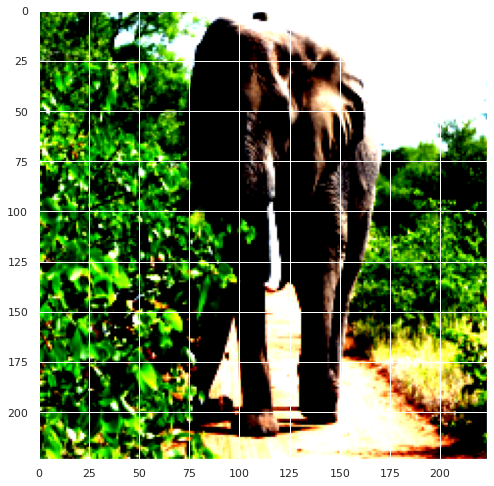

Attribute vector: tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
        0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
        1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.],
       dtype=torch.float64)


In [ ]:
train_features, train_attributes, _ = next(iter(train_dataloader))
img = train_features[0].permute(1, 2, 0)
attributes = train_attributes[0]
plt.imshow(img, cmap="gray")

plt.show()
print(f"Attribute vector: {attributes}")

# Models and Evaluation

## Experimental Setup

How did you evaluate your methods? Why is that a reasonable evaluation metric for the task?

*We evaluate the model as the evaluate function we wrote below. We focused on maximize the accuracy of our model to predict 85 attributes. We use the mean accuracy of all the attribute predictions. This is a good metric because the animal class prediction is directly generated from the attributes.*

What did you use for your loss function to train your models? Did you try multiple loss functions? Why or why not?

*We used Binary Cross Entropy loss to train the model. Because the out put we have are 85 independent attributes. We are not choosing one from them. All of them should be considered durring calculating the loss. Binary Cross Entropy loss is the perfect fit here.*

How did you split your data into train and test sets? Why?

*First, we use 40 classes of animals as train-val set and 10 classes of animals as test set. We split it this way because we are doing zero shot learning. We need the test model to be completely trained without the test set. After that, we do a 80-20 train-val split on the train-val classes.*

In [ ]:
# Code for loss functions, evaluation metrics or link to Git repo

In [ ]:
def evaluate(loader, model, device):
    total = 0
    correct = 0
    # use model to get predictions
    with torch.no_grad():
        for X, y, _ in loader:
            X, y = X.to(device), y.to(device)
            output = model(X)
            predictions = (output > 0.5)*1

            # total number of items in dataset
            total += y.shape[0]

            # number of correctly labeled items in dataset
            correct += torch.sum(predictions == y)

    # return fraction of correctly labeled items in dataset
    return float(correct) / float(total)


## Baselines

What baselines did you compare against? Why are these reasonable?

*Please see the answers in the methods part, since we construct our own baseline model.*

Did you look at related work to contextualize how others methods or baselines have performed on this dataset/task? If so, how did those methods do?

Other related works used SSE (semantic similarity embedding) or LatEm (Laten Embedding) on this task. We reckon that they are not closely related to what we learnt in class so we dicided to use a simpler baseline

In [ ]:
# Baseline model
class Baseline(nn.Module):
    def __init__(self):
        super(Baseline, self).__init__()
        self.resnet = models.resnet50(pretrained=True)
        for param in self.resnet.parameters():
            param.requires_grad = False
        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_ftrs, 85)
        self.sigmoid = nn.Sigmoid()

    def forward(self, images):
        output = self.sigmoid(self.resnet(images))
        return output

In [ ]:
def train_model(model, train_loader, val_loader, device, epoch=32, args=None):
    model = model.to(device)
    avg_train_loss = []
    avg_val_loss = []
    avg_train_acc = []
    avg_val_acc = []
    best_val_score = float('inf')
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.BCELoss()
    out_name = datetime.now().strftime("%m-%d-%Y-%H-%M-%S")
    # train
    for e in range(epoch):
        print('epoch:%d' % e)
        train_loss = 0
        val_loss = 0
        b = 0
        for X, y, _ in train_loader:
            b += 1
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            output = model(X)
            loss = criterion(output, y.float())
            loss.backward()
            optimizer.step()
            train_loss += loss.detach()

            # DEBUG
            # break

        tl = torch.mean(train_loss)
        tl_item = tl.item()/b
        avg_train_loss.append(tl_item)

        train_acc = evaluate(train_loader, model, device)
        avg_train_acc.append(train_acc)
        print('train loss:{0}, train accuracy{1}'.format(tl_item, train_acc))

        # val
        total = 0
        correct = 0
        with torch.no_grad():
            b = 0
            for X, y, _ in val_loader:
                b += 1
                X, y = X.to(device), y.to(device)
                output = model(X)

                predictions = (output > 0.5)*1

                correct += torch.sum(predictions == y)
                total += y.shape[0]

                loss = criterion(output, y.float())
                val_loss += loss.detach()

                # DEBUG
                # break

            avg_val = torch.mean(val_loss)
            vl_item = avg_val.item()/b
            avg_val_loss.append(vl_item)
        val_acc = float(correct) / float(total)
        avg_val_acc.append(val_acc)
        print('validation loss:{0}, validation accuracy{1}'.format(
            vl_item, val_acc))

        if vl_item < best_val_score:
            best_val_score = vl_item
            torch.save(model.state_dict(), out_name + '.pt')

    with open('./'+out_name+'.log', 'w') as f:
        f.write('epoch:%d\n' % (e+1))
        f.write('train loss:{0}, train accuracy{1}\n'.format(
            tl_item, train_acc))
        f.write('validation loss:{0}, validation accuracy{1}\n'.format(
            vl_item, val_acc))

    # plot
    ix = np.arange(len(avg_train_loss))
    # change this for keeping scale
    plt.ylim(0, 3)
    plt.plot(ix, avg_train_loss, label="training loss")
    plt.plot(ix, avg_val_loss, label="validation loss")
    plt.title('loss graph')
    plt.legend()
    plt.savefig(out_name+"_loss.png")
    plt.show()
    plt.clf()

    print(avg_train_acc)
    print(avg_val_acc)
    ix = np.arange(len(avg_train_acc))
    # change this for keeping scale
    plt.ylim(0.5, 1)
    plt.plot(ix, avg_train_acc, label="training accuracy")
    plt.plot(ix, avg_val_acc, label="validation accuracy")
    plt.title('accuracy graph')
    plt.legend()
    plt.savefig(out_name+"_acc.png")
    plt.show()
    plt.clf()

    model.load_state_dict(torch.load(out_name + '.pt'))

    return model


In [ ]:
def main(model):
    train_subset, val_subset = train_val_split(training_data)
    train_dataloader = DataLoader(train_subset, batch_size=64, shuffle=True)
    val_dataloader = DataLoader(val_subset, batch_size=64, shuffle=True)
    test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    # model = Baseline()
    # model = Custom1()
    # model.load_state_dict(torch.load('Baseline' + '.pt'))
    model = train_model(model, train_dataloader,
                        val_dataloader, device, epoch=10)
    test_acc = evaluate(test_dataloader, model, device)
    print('Test Accuracy:{0}'.format(test_acc))
    return model

In [ ]:
model = Baseline()
model = main(model)

## Methods

What methods did you choose? Why did you choose them?

*The first stage is to link images to their corresponding attribute vectors. Since our goal is to perform zero-shot image classifications, we first use pretrained Residual Networks with 50 layers (ResNet-50) to extract images features that are helpful for recoginizing images. Pretrained ResNet-50 could achieve good performance for image classification task since it is trained over a million images from different object categories in the ImageNet database. Besides, as essential building blocks of ResNet-50, residual blocks that use skip connections could overcome vanishing gradient problems though ResNet-50 is a deep neural network. In the zero-shot learning paradigm, images used to train the model are regarded as those belonging to 'seen classes'. On the other hand, classes of images that do not apprear in the training process belong to 'unseen classes'. To successfully implement zero-shot learning, attribute vectors that related to each animal type are needed to serve as the bridge between seen classes and unseen classes such that our model could have generalization power for classifying images that don't show up in the training process. Therefore, after image features are extracted from ResNet-50, we perform a linear projection directly to map image features into attribute space. Since neural networks are universal approximators, the projection function can be learned using neural networks. ResNet-50 with one additional linear layer are constructed as our baseline model and sigmoid function is used for the probabilities of each attribute. Similarly, to explore the effect of nonlinear projection function on the accuracy of prediction, ResNet-50 with three layers are constructed and ReLU function is only used in the first layer to achieve the nonlinear properties. Besides, after the second linear layer we implement the dropout method with probability equal to 0.5. Sigmoid function is included as before for the classification of attributes. After projection functions are learned according to neural networks with fully-connected layers, attribute vectors for unseen classes are predicted. The second stage is to perform classification task based on the attribute vectors and animal type lables. Here, nearest neighbor search is implemented using randomly selected unseen examples with size 700 due to RAM issue. However, since only images belonging to seen classes are used to learn the projection function in the training process, there's a high probability that our model will be biased towards predicting attibute vectors belonging to these seen classes as output. Besides, since our training data and test test data are in different domains and their distributions differ from each other, our model cannot guarantee that during test time the projection function could succesfully map images features to their corresponding attribute space. Therefore, we explore a generative method for generating information related to images according to attibutes that belong to the unseen classes. Here, we focus on synthesizing images features instead of images for unseen classes due to the noiseness of pixes and difficulty in training the model. The combinined generated image features for unseen classes with image features extracted from ResNet-50 for seen classes are feeded into the neural network that have the same structure as that mentioned above for learning the nonlinear projection function. In this case, partial information contained in the images features and generated by shared attributes for unseen classes has the capability to increase the generalization power of our model. We explore one of the conditional GAN structures (f-GAN) described in this paper to generate image features rather than image pixels. (https://arxiv.org/pdf/1712.00981.pdf).*

How did you train these methods, and how did you evaluate them? Why?

*For extracting images features part, we use the pretrained ResNet directly. For training the linear projection and nonlinear projection function, mini-batch gradient descent is implemented with the batch size equal to 64. Training loss and validation loss are monitored to avoid overfitting issues when projection function is learned. 
KNearestNeighbor Classifier is trained using attribute vectors for unseen classes with corresponding class lables. Then predicted attribute vectors are feeded into this classifier for predicting class labels for unseen classes. Accuracy is used as the evaluation metric for both predicting 85 attributes and final class labels. For training f-GAN, the generator takes attribute vectors with fixed randomly generated Gaussian noise as input and produce corresponding fake image features. These fake image features are feeded into discriminator so that discrimnator works on distinguishing fake image features from real image features. f-GAN is trained using mini-batch gradient descent with batch size equal to 32 and in each epoch, both generator and discriminator are trained once. Generator is trying to minimize the loss function; however, discriminator is trying to maximize the loss function. After f-GAN being trained, we will extract layers that perform nonlinear projection from the neural network and continue to it using fake image features generated by the generator in f-GAN for unseen classes.*


Which methods were easy/difficult to implement and train? Why?

*Baseline model was easy to implement and train, since it is composed of a pretrained ResNet-50 and one additional linear layer.
GANs was difficult to train, since both generator and dicriminator are trained simultaneously. Besides, generator and discrinator are competitors such that the training process is inherently unstable.*

For each method, what hyperparameters did you evaluate? How sensitive was your model's performance to different hyperparameter settings?

*We don't tune any hyperparameters*

In [ ]:
# Code for training models, or link to your Git repository

In [ ]:
# Show plots of how these models performed during training.
#  For example, plot train loss and train accuracy (or other evaluation metric) on the y-axis,
#  with number of iterations or number of examples on the x-axis.

In [ ]:
class Custom1(nn.Module):
    def __init__(self):
        super(Custom1, self).__init__()
        self.resnet = models.resnet50(pretrained=True)
        for param in self.resnet.parameters():
            param.requires_grad = False
        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_ftrs, 1000)
        self.fc1 = nn.Linear(1000,256)
        self.fc2 = nn.Linear(256,256)
        self.fc3 = nn.Linear(256,85)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout()
        self.sigmoid = nn.Sigmoid()

    def forward(self, images):
        x = self.resnet(images)
        x = self.relu(self.fc1(x))
        x = self.dropout(self.fc2(x))
        output = self.sigmoid(self.fc3(x))
        return output

In [ ]:
model = Custom1()
model = main(model)

In [ ]:
class Resnet(nn.Module):
    def __init__(self):
        super(Resnet, self).__init__()
        self.resnet = models.resnet50(pretrained = True)
    def forward(self, images):
        return self.resnet(images)

In [ ]:
# GAN
class Generator(nn.Module):
    def __init__(self, z_dim = 85, img_dim = 1000):
        super(Generator, self).__init__()
        self.linear1 = nn.Linear(z_dim, 256)
        self.linear2 = nn.Linear(256, 1000)
        self.leaky_relu = nn.LeakyReLU(0.01)
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.leaky_relu(self.linear1(x))
        x = self.tanh(self.linear2(x))
        return x

class Discriminator(nn.Module):
    def __init__(self, img_feature_dim = 1000):
        super(Discriminator, self).__init__()
        self.linear1 = nn.Linear(img_feature_dim, 128)
        self.linear2 = nn.Linear(128, 1)
        self.leaky_relu = nn.LeakyReLU()
        self.sigmoid = nn.Sigmoid()


    def forward(self, x):
        x = self.leaky_relu(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        return x

In [ ]:
# Train GAN
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
lr = 3e-4
z_dim = 85
image_dim = 1000
batch_size = 32
num_epochs = 50

disc = Discriminator(image_dim).to(device)
gen = Generator(z_dim, image_dim).to(device)
res = Resnet().to(device)
fixed_noise = torch.randn((batch_size, z_dim)).to(device)

dataset = training_data
loader = DataLoader(training_data, batch_size=32, shuffle=True)
opt_disc = torch.optim.Adam(disc.parameters(), lr=lr)
opt_gen = torch.optim.Adam(gen.parameters(), lr=lr)
criterion = nn.BCELoss()
# writer_fake = SummaryWriter(f"logs/fake")
# writer_real = SummaryWriter(f"logs/real")
step = 0

for epoch in range(num_epochs):
    print('epoch%d' % epoch)
    for batch_idx, (img, _, _) in enumerate(loader):
        if batch_idx == 0:
            print(
                f"Epoch [{epoch}/{num_epochs}] Batch {batch_idx}/{len(loader)} \
                    Loss D: {lossD:.4f}, loss G: {lossG:.4f}"
            )
            with open('./GAN.log','a') as f:
                f.write(f"Epoch [{epoch}/{num_epochs}] Batch {batch_idx}/{len(loader)} \
                    Loss D: {lossD:.4f}, loss G: {lossG:.4f}\n")
        img = img.to(device)
        real = res(img)
        real = real.view(-1, 1000)
        batch_size = real.shape[0]

        ### Train Discriminator: max log(D(x)) + log(1 - D(G(z)))
        noise = torch.randn(batch_size, z_dim).to(device)
        fake = gen(noise)
        disc_real = disc(real).view(-1)
        lossD_real = criterion(disc_real, torch.ones_like(disc_real))
        disc_fake = disc(fake).view(-1)
        lossD_fake = criterion(disc_fake, torch.zeros_like(disc_fake))
        lossD = (lossD_real + lossD_fake) / 2
        disc.zero_grad()
        lossD.backward(retain_graph=True)
        opt_disc.step()

        ### Train Generator: min log(1 - D(G(z))) <-> max log(D(G(z))
        # where the second option of maximizing doesn't suffer from
        # saturating gradients
        output = disc(fake).view(-1)
        lossG = criterion(output, torch.ones_like(output))
        gen.zero_grad()
        lossG.backward()
        opt_gen.step()


    torch.save(gen.state_dict(), 'generator%d.pt'%epoch)
    torch.save(disc.state_dict(), 'discriminator%d.pt'%epoch)

In [ ]:
# Generate fake image features for unseen classes
z_dim = 85
image_dim = 1000
test_dataloader = DataLoader(test_data,shuffle=False)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
gen = Generator(z_dim, image_dim).to(device)
gen.load_state_dict(torch.load(os.path.join(dir,'./GAN', 'generator.pt'), map_location=torch.device('cpu')))

with torch.no_grad():
    for idx , (_, attri, _) in enumerate(test_dataloader):
        if idx == 0:
            fake_img = gen(attri.view(-1).to(torch.float32)).view(1,-1)
        else:
            fake_img = torch.cat((fake_img, gen(attri.view(-1).to(torch.float32).view(1,-1))))
        

In [ ]:
class GenDataset(Dataset):
  def __init__(self, img_features, attributes_file, transform=None):
    self.img_features = img_features
    self.attributes = attributes_file
    self.transform = transform

  def __len__(self):
    return len(self.attributes)

  def __getitem__(self, index):
    attributes = np.array(self.attributes.iloc[idx, :85].values.tolist())
    if self.transform:
            attributes = self.transform(attributes)
            img_features = self.transform(img_features)
    return img_features, attributes

In [ ]:
transform = transforms.Compose([
    torch.from_numpy])
train_gen = GenDataset(img_features = fake_img, attributes_file=test_matrix,
                               transform=transform)

In [ ]:
# Continue to train custom model using generated image features for unseen classes [Not finished yet]
custom2 = Custom1()  
custom2.load_state_dict(torch.load(os.path.join(dir,'./Custom', 'custom.pt'), map_location=torch.device('cpu')))
del custom2.resnet

In [ ]:
# Predict attibutes features (baseline & custom model)
def predict(loader, model, device):
    model = model.to(device)
    with torch.no_grad():
        for X, attri, label in test_dataloader:
            out = model(X.to(device))
            attri_preds = (out > 0.5)*1
            break
        return attri_preds, label, attri

test_dataloader = DataLoader(
    test_data, batch_size=700, shuffle=True)
 

#Baseline
baseline = Baseline()
baseline.load_state_dict(torch.load(os.path.join(dir,'./Baseline', 'Baseline.pt'), map_location=torch.device('cpu')))
baseline.eval();

# Custom1
custom1 = Custom1()  
custom1.load_state_dict(torch.load(os.path.join(dir,'./Custom', 'custom.pt'), map_location=torch.device('cpu')))
custom1.eval(); 

# predict attribute vectors for unseen classes (test classes)
preds_base =  predict(test_dataloader, baseline, device)
preds_custom =  predict(test_dataloader, custom1, device)
  

In [ ]:
# Nearest Neighbor Search
from sklearn.neighbors import KNeighborsClassifier
# base
neigh_base = KNeighborsClassifier(n_neighbors=5)
X_base, y_base = preds_base[2], preds_base[1]
neigh_base.fit(X_base, y_base)
# custom
neigh_custom = KNeighborsClassifier(n_neighbors=5)
X_custom, y_custom = preds_custom[2], preds_custom[1]
neigh_custom.fit(X_custom, y_custom)

KNeighborsClassifier()

## Results

Show tables comparing your methods to the baselines.

What about these results surprised you? Why?

*Even though the attribute test accuracy didn't improve much from baseline model to our model, the class prediction accuracy increased dratistically.*

Did your models over- or under-fit? How can you tell? What did you do to address these issues?

*As we have almost train and validation accuracy, we belive our model is fitted well. We did well on the attribute prediction part, but we still have room to improve our model on the animal class prediction part. This may because the GAN is super sensitive to hyperparameters and we didn't tune it very well so it didn't generate enough good data augmentation to improve our model further.*

What does the evaluation of your trained models tell you about your data? How do you expect these models might behave differently on different data?  

*The dataset to train this model has its restriction. The animal image data need to come with its class and attributes to be trained. This means that we need to hard code the 85 attributes for any new class of animal needed to be train. But for the prediction, we are confidence about our model and believe it can work on any animal because this is a zero shot learning model. Even the model may not be super accuracy to predict the exact animal class, it can always predict a class that is close to the animal in the image.*

In [ ]:
# Show plots or visualizations of your evaluation metric(s) on the train and test sets.
#   What do these plots show about over- or under-fitting?
#   You may borrow from how we visualized results in the Lab homeworks.
#   Are there aspects of your results that are difficult to visualize? Why?

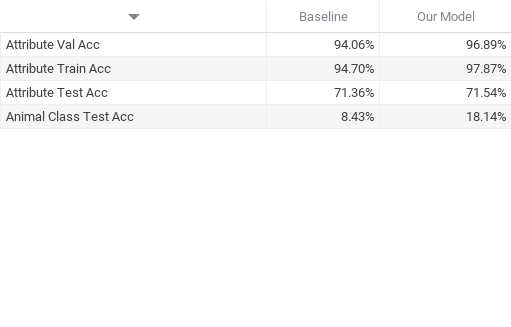

In [ ]:
from IPython.display import Image
Image(filename=os.path.join(dir,'table1.png')) 

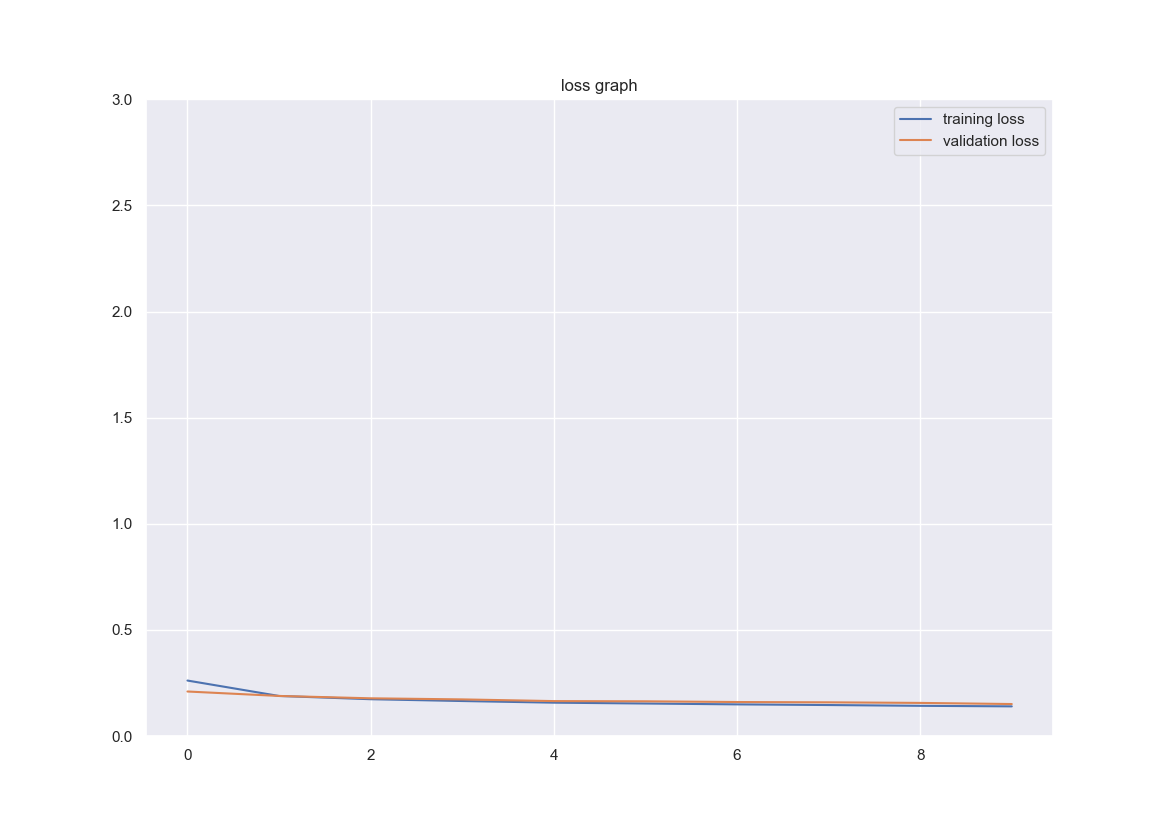

In [ ]:
Image(filename=os.path.join(dir,'./Baseline', 'Baseline_loss.png')) 

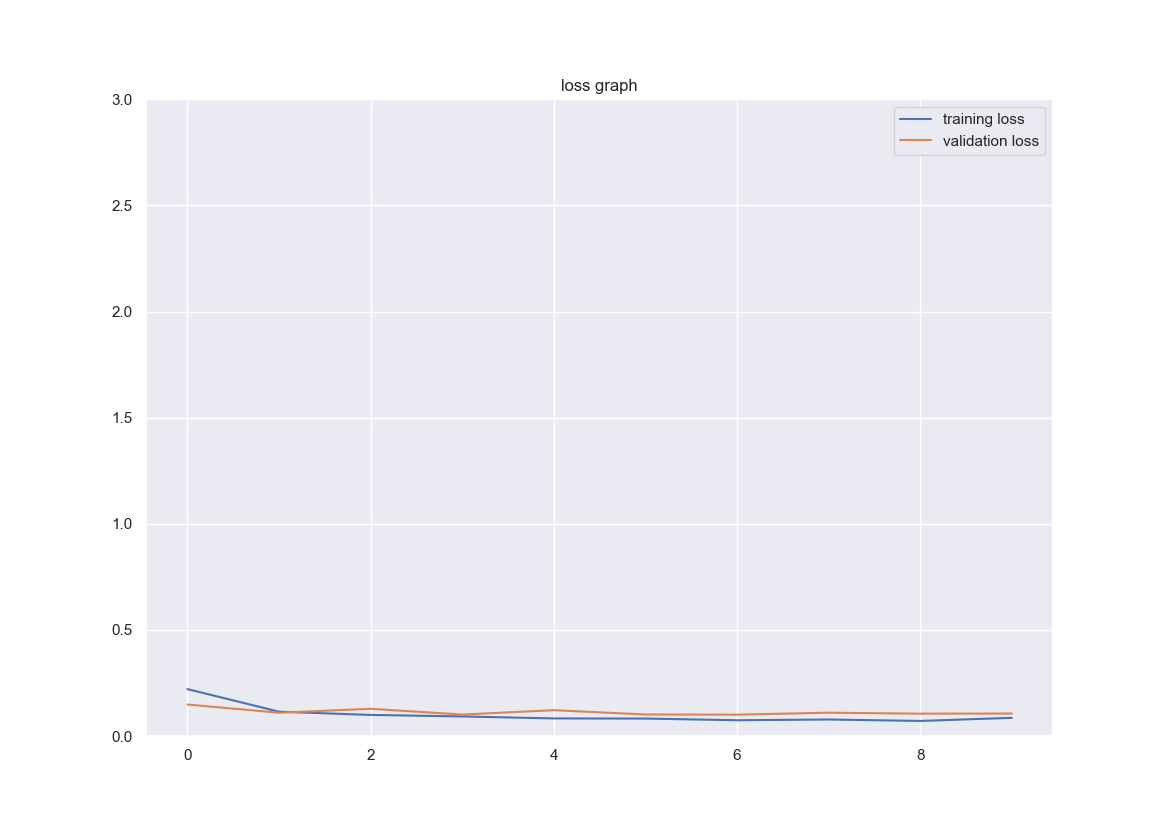

In [ ]:
Image(filename=os.path.join(dir,'./Custom', 'custom_loss.png')) 

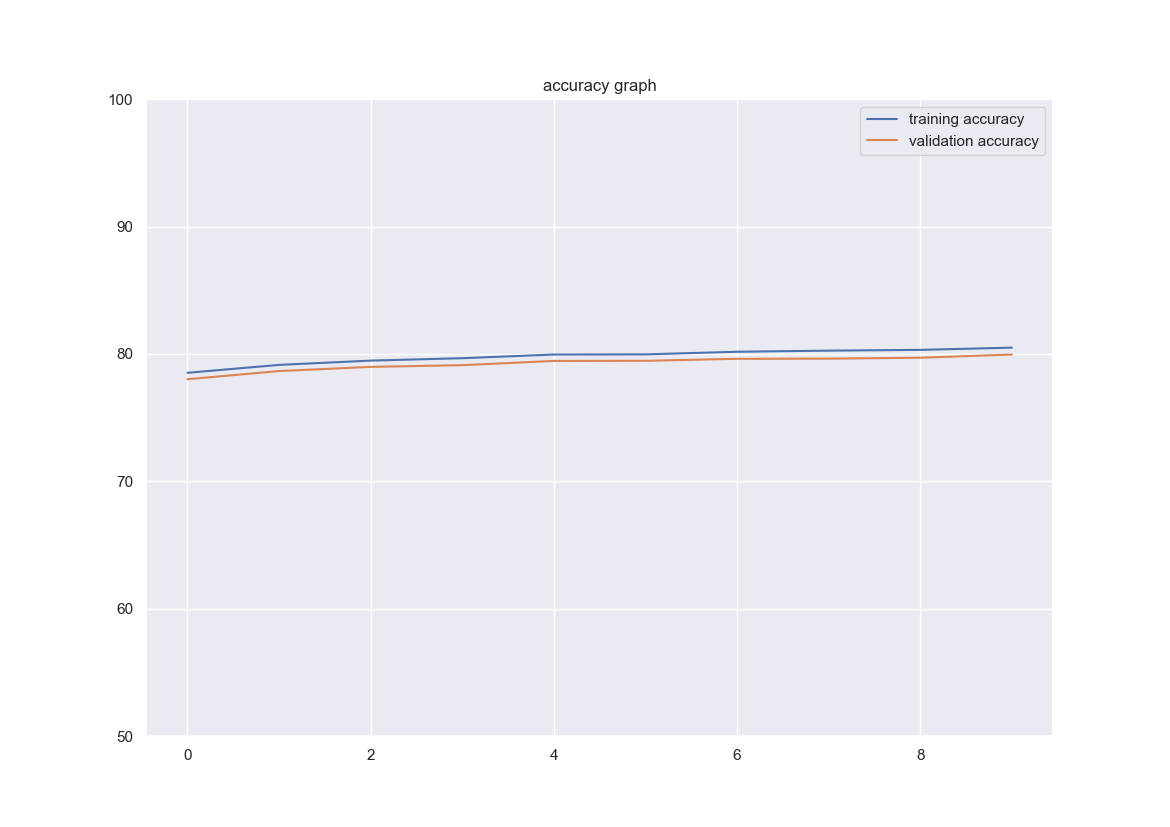

In [ ]:
Image(filename=os.path.join(dir,'./Baseline', 'Baseline_acc.png')) 

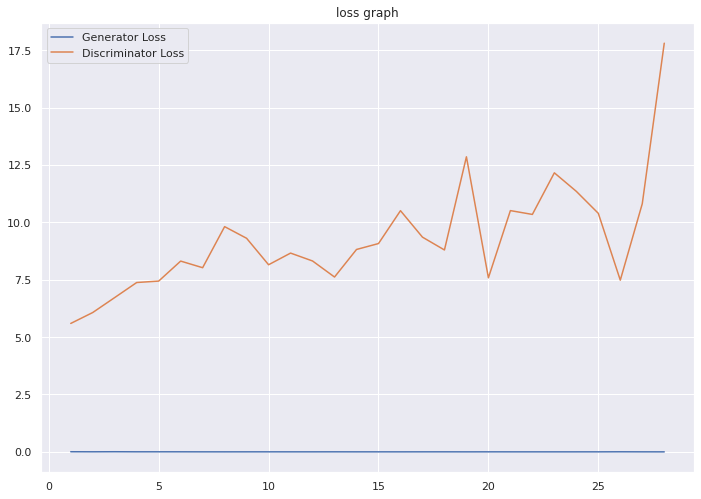

In [ ]:
gan_loss = pd.read_csv(os.path.join(dir,'./GAN', 'GAN_loss.txt'), sep = ',')
gan_loss = gan_loss.set_index(np.arange(1,len(gan_loss) + 1))
plt.plot(np.arange(1,len(gan_loss) + 1), gan_loss['Loss D'], label = 'Generator Loss' )
plt.plot(np.arange(1,len(gan_loss) + 1), gan_loss[' loss G'], label = 'Discriminator Loss')
plt.legend()
plt.title('loss graph');

In [ ]:
# Nearest Neighbor classifier accuracy evaluation
from sklearn.metrics import accuracy_score
label_preds = neigh_base.predict(preds_base[0])
print("Nearest Neighbor Classifier -- attribute vectors predicted by baseline model")
print(f"The accuracy for unseen classes is {accuracy_score(y_base, label_preds)}")
  

Nearest Neighbor Classifier -- attribute vectors predicted by baseline model
The accuracy for unseen classes is 0.08428571428571428


In [ ]:
# Nearest Neighbor classifier evaluation
label_preds = neigh_custom.predict(preds_custom[0])
print("Nearest Neighbor Classifier -- attribute vectors predicted by custom model")
print(f"The accuracy for all unseen classes is {accuracy_score(y_custom, label_preds)}")

Nearest Neighbor Classifier -- attribute vectors predicted by custom model
The accuracy for all unseen classes is 0.18142857142857144


# Discussion

## What you've learned

*Note: you don't have to answer all of these, and you can answer other questions if you'd like. We just want you to demonstrate what you've learned from the project.*

What concepts from lecture/breakout were most relevant to your project? How so? 

*The convolutional neural network is the most relavent part to our project because the ResNet we are using is essentially a mature version of such a model and the concepts are mostly helpful for the classification tasks on these images.*

What aspects of your project did you find most surprising? 

*The integration of a discriminative and generative model together to mitigate the bias.*

What lessons did you take from this project that you want to remember for the next ML project you work on? Do you think those lessons would transfer to other datasets and/or models? Why or why not?


One lesson was the importance and amount of time that needs to be dedicated to data processing; this can easily serve as a bottleneck, as to properly develop the model, a sense of what the data will look like is required. This is certainly a lesson that can be passed on to other projects, as with any project, the data needs to properly formatted for the desired model. Almost any data set will require some work before it can be piped in, and this process should be considered and begun early on.

What was the most helpful feedback you received during your presentation? Why? 

*We are inspired by the question where another group was asking about images used in our training/testing set are front facing or multi-angled and whether our model is expected to be able to for example distinguish the back of a lion and a tiger. Based on our result, our model can recognize animals with different facing angles because the abstracted feature of animals have been abstracted by implementing the zero-shot learning. So this is a good point for us to reflect on the features we distilled from the images.*

If you had two more weeks to work on this project, what would you do next? Why?

*First, we would explore sampling methods of splitting training set and validation set based on the class categories. At present, we just split training and validation set according to the number of examples that should be within each set. However, we're trying to explore zero-shot learning, class-category-based would outperform our current method in training models since models should not see the validation set during training. Besides, methods of training GANs efficiently and successfully would be explored. If possible, since attribute space could be regarded as the bottleneck in the autoncoder, a variational autoencoder that could overcome overfitting would be added in the projection function part such that our model could also have the capability to reconstruct image features from attribute space.*

## References

[1] Y. Xian, C. H. Lampert, B. Schiele, Z. Akata. "Zero-Shot Learning - A Comprehensive Evaluation of the Good, the Bad and the Ugly", IEEE Transactions on Pattern Analysis and Machine Intelligence (T-PAMI) 40(8), 2018. (arXiv:1707.00600 [cs.CV])

[2] Y. Xian, Z. Akata, G. Sharma, Q. Nguyen, M. Hein, and B. Schiele,
“Latent embeddings for zero-shot classification,” in CVPR, 2016.

[3] R. Socher, M. Ganjoo, C. D. Manning, and A. Ng, “Zero-shot learning
through cross-modal transfer,” in NIPS, 2013.

[4] Z. Zhang and V. Saligrama, “Zero-shot learning via semantic similarity
embedding,” in ICCV, 2015.

In [ ]:
""